In [5]:
#Topic 5: Population game | bias, migration, political ideas

import math
import random
import matplotlib.pyplot as plt

# change code here
stdID = 1513
month = 2

#-----------------------------#
# Assignment
stdList = list(map(int, str(stdID)))
## payoff matrix
a = max(stdList)
stdList_filter = [number for number in stdList if number != a]
b = max(stdList_filter)
c = 0.5 + 0.1*min(stdList)
d = 0
## initial proportion
propLAo = 0.3 + 0.01*month
propRoB = propLAo
propAB = 1 - propLAo - propRoB

# Define the population game 
actList = [0, 1, 2] #act=0 for Ao, act=1 for AB, act=2 for oB
actLabels = ['Ao','AB','oB']
actColors = ['r','m','b']
Pi = [ [a, a-c, d] , [a-c, a-c, b-c], [d, b-c, b] ] #The payoff matrix, needs to be symmetric

## Connection between populations
popList = [0, 1, 2] #pop=0 for Lo, pop=1 for LR, pop=2 for oR
popLabels = ['Lo','LR','oR']
G = [ [1, 1, 0], [1, 1, 1], [0, 1, 1] ] #Connection matrix, needs to be symmetric

## Structured game 
strtgList = [ [act, pop] for pop in popList for act in actList ] #a strategy is a pair of act & pop

def payfn(strtgDist): #define the payoff function
    payoffs = [ [0 for pop in popList] for act in actList ] #payoffs [act][pop]
    for pop in popList:
        oppActDist = [
            sum(
                G[pop][oppPop]*strtgDist[oppAct][oppPop] for oppPop in popList
            )
            for oppAct in actList
        ]
        for act in actList:
            payoffs[act][pop] = sum(
                [
                    Pi[act][oppAct]*oppActDist[oppAct] for oppAct in actList
                ]
            )
    return payoffs

# Define Agent class 
revA, revP, revAP = 0.0475, 0.0475, 0.0025

class Agent():
    ## Constructor
    def __init__(self, act, pop):
        self.act, self.pop = act, pop
    
    ## Structured best response
    def BRonAP(self, payoffs):
        draw = random.uniform(0,1)
        if draw < revA: # revise the action only
            brAct = max(
                actList, key=lambda act: payoffs[act][self.pop]
            )
            if payoffs[brAct][self.pop] > payoffs[self.act][self.pop]:
                self.act = brAct
        elif draw < revA + revP: # revise only pop 
            brPop = max(
                popList, key=lambda pop: payoffs[self.act][pop]
            )
            if payoffs[self.act][brPop] > payoffs[self.act][self.pop]:
                self.pop = brPop
        elif draw < revA + revP + revAP: #revise both 
            [brAct, brPop] = max(
                strtgList, key=lambda strtg: payoffs[strtg[0]][strtg[1]]
            )
            if payoffs[brAct][brPop] > payoffs[self.act][self.pop]:
                self.act, self.pop = brAct, brPop

# Some useful functions
def strtgDist_cal():
    strtgDist = [ [0 for pop in popList] for act in actList]
    #strgtDist[act][pop]
    for agent in agentsList:
        strtgDist[agent.act][agent.pop] +=1 #Simply count the number of players in each strtg
    for strtg in strtgList:
        strtgDist[strtg[0]][strtg[1]] = strtgDist[strtg[0]][strtg[1]]/len(agentsList) #divide by all population to get prob dist
    return strtgDist

# Parameters
init_strtgDist = [ [propLAo, 0, 0], [0, propAB, 0], [0, 0, propAB] ]
init_numAllAgents = 50000
numDays = 200

init_NumPlayers = [ [0 for pop in popList] for act in actList]
agentsList = []

for act in actList:
    for pop in popList:
        init_NumPlayers[act][pop] = math.floor(
            init_numAllAgents*init_strtgDist[act][pop]
        )
        agentsList += [ Agent(act,pop) for i in range(init_NumPlayers[act][pop]) ]

strtgDist_current = strtgDist_cal()
payoffs_current = payfn(strtgDist_current)
strtgDist_hist = [strtgDist_current]
payoffs_hist = [payoffs_current]

# Simulation 
for day in range(numDays):
    for agent in agentsList:
        agent.BRonAP(payoffs_current)
    strtgDist_current = strtgDist_cal()
    payoffs_current = payfn(strtgDist_current)
    strtgDist_hist.append(strtgDist_current)
    payoffs_hist.append(payoffs_current)

# Plot results
for pop in popList:
    # Shares
    plt.figure()
    plt.stackplot(
        list(range(numDays)), [
            [ strtgDist_hist[day][act][pop] for day in range(numDays)] for act in actList
        ],
        labels= actLabels, 
        colors= actColors
    )
    plt.legend()
    plt.title('share of each action in' + popLabels[pop] )
    
    #Payoffs 
    plt.figure()
    for act in actList:
        plt.plot(
            [
                payoffs_hist[day][act][pop] for day in range(numDays)
            ], 
            label= actLabels[act],
            color= actColors[act]
            )
    plt.legend()
    plt.title('payoff of each action in' + popLabels[pop] )

plt.close('all') # uncomment to see plots


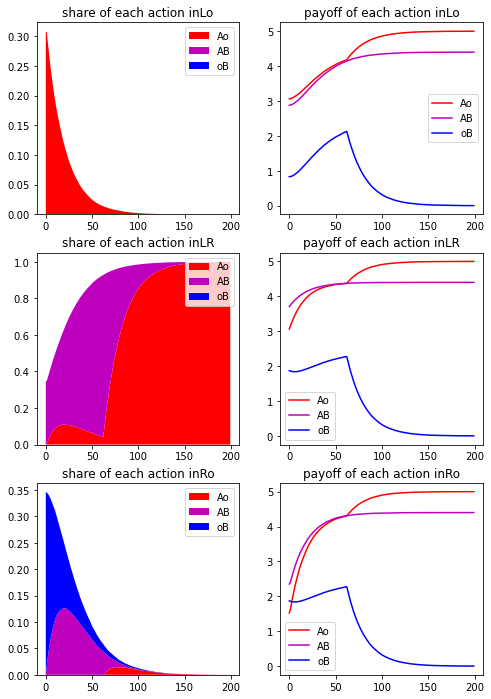

In [6]:
# Alternative plots
#  plot Numerical Data
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(8,12))

for pop in popList:
    # Shares
    plt.subplot(a, b, c)
    plt.stackplot(
        list(range(numDays)), [
            [ strtgDist_hist[day][act][pop] for day in range(numDays)] for act in actList
        ],
        labels= actLabels, 
        colors= actColors
    )
    c = c+1
    plt.legend()
    plt.title('share of each action in' + popLabels[pop] )

    #Payoffs 
    plt.subplot(a, b, c)
    for act in actList:
        plt.plot(
            [
                payoffs_hist[day][act][pop] for day in range(numDays)
            ], 
            label= actLabels[act],
            color= actColors[act]
            )
    plt.legend()
    plt.title('payoff of each action in' + popLabels[pop] )
    c = c+1
plt.show()

In Lo, initially, Ao was dominant and still dominant in the longrun. 
Then they interacted with LR and started to migrate.
In LR, AB was dominant, in the medium-run, AB is still dominant.
In the long-run, due to a surge in the population, Ao eventually became dominant because the payoff from choosing Ao got higher than the bilingual option.
In oR, oB was dominant, but they intereacted with LR and then gradually switched to AB.
After which, like LR, AB started to lose its charm, people also start to choose Ao because the payoff is higher than the bilingual option.
Eventually, Ao became dominant in all 3 populations.
Summary: medium-run: (Ao, AB, AB) -> long-run(Ao, Ao, Ao)

In [9]:
x = (a-c)*(propLAo + (propAB + propRoB))
y = a*propLAo + (a-c)*(propAB + propRoB)
x < y

True